In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('WHS6_102.csv', sep=',"')

for col in list(data.columns):
    data[col] = data[col].str.strip('"')
    
data.columns = [i.strip('"') for i in list(data.columns)]

<ipython-input-2-366b563ca3ce>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('WHS6_102.csv', sep=',"')


In [3]:
nursing_data = pd.read_csv('Nursing_Data.csv')

In [4]:
data['Year'] = data.Year.astype('int64')

In [5]:
A = pd.DataFrame({'Color': ['Green', 'Yellow', 'Red'], 'Size': ['S', 'M', 'L']})
B = pd.DataFrame({'Color': ['Green', 'Yellow', 'Pink'], 'Code': [1001, 1010, 1100]})

In [6]:
A

Color Size
0   Green    S
1  Yellow    M
2     Red    L

In [7]:
B

Color  Code
0   Green  1001
1  Yellow  1010
2    Pink  1100

In [8]:
pd.merge(A, B, how='outer')

Color Size    Code
0   Green    S  1001.0
1  Yellow    M  1010.0
2     Red    L     NaN
3    Pink  NaN  1100.0

In [9]:
data.head()

Country  Year Hospital beds (per 10 000 population)
0  Afghanistan  2015                                     5
1  Afghanistan  2014                                     5
2  Afghanistan  2013                                     5
3  Afghanistan  2012                                     5
4  Afghanistan  2011                                     4

In [10]:
nursing_data.head()

Country  Year  Nursing and midwifery personnel (per 10 000 population)  \
0  Afghanistan  2017                                              1.755         
1  Afghanistan  2016                                              1.482         
2  Afghanistan  2015                                              1.299         
3  Afghanistan  2014                                              1.476         
4  Afghanistan  2013                                              2.495         

   Nursing and midwifery personnel  (number)  Nursing personnel (number)  \
0                                       6370                      6370.0   
1                                       5243                      5243.0   
2                                       4471                      4471.0   
3                                       4925                      4925.0   
4                                       8052                      4552.0   

   Midwifery personnel (number)  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                        3500.0

In [12]:
pd.merge(nursing_data, data, on=["Country", "Year"], how='outer')

Country  Year  \
0     Afghanistan  2017   
1     Afghanistan  2016   
2     Afghanistan  2015   
3     Afghanistan  2014   
4     Afghanistan  2013   
...           ...   ...   
3153        Yemen  2003   
3154        Yemen  2002   
3155        Yemen  2001   
3156        Yemen  2000   
3157     Zimbabwe  2006   

      Nursing and midwifery personnel (per 10 000 population)  \
0                                                 1.755         
1                                                 1.482         
2                                                 1.299         
3                                                 1.476         
4                                                 2.495         
...                                                 ...         
3153                                                NaN         
3154                                                NaN         
3155                                                NaN         
3156                                                NaN         
3157                                                NaN         

      Nursing and midwifery personnel  (number)  Nursing personnel (number)  \
0                                        6370.0                      6370.0   
1                                        5243.0                      5243.0   
2                                        4471.0                      4471.0   
3                                        4925.0                      4925.0   
4                                        8052.0                      4552.0   
...                                         ...                         ...   
3153                                        NaN                         NaN   
3154                                        NaN                         NaN   
3155                                        NaN                         NaN   
3156                                        NaN                         NaN   
3157                                        NaN                         NaN   

      Midwifery personnel (number) Hospital beds (per 10 000 population)  
0                              NaN                                   NaN  
1                              NaN                                   NaN  
2                              NaN                                     5  
3                              NaN                                     5  
4                           3500.0                                     5  
...                            ...                                   ...  
3153                           NaN                                     6  
3154                           NaN                                     6  
3155                           NaN                                     6  
3156                           NaN                                     6  
3157                           NaN                                    30  

[3158 rows x 7 columns]

In [13]:
pd.merge(nursing_data, data, on=['Country', 'Year'], how='outer', indicator=True)

Country  Year  \
0     Afghanistan  2017   
1     Afghanistan  2016   
2     Afghanistan  2015   
3     Afghanistan  2014   
4     Afghanistan  2013   
...           ...   ...   
3153        Yemen  2003   
3154        Yemen  2002   
3155        Yemen  2001   
3156        Yemen  2000   
3157     Zimbabwe  2006   

      Nursing and midwifery personnel (per 10 000 population)  \
0                                                 1.755         
1                                                 1.482         
2                                                 1.299         
3                                                 1.476         
4                                                 2.495         
...                                                 ...         
3153                                                NaN         
3154                                                NaN         
3155                                                NaN         
3156                                                NaN         
3157                                                NaN         

      Nursing and midwifery personnel  (number)  Nursing personnel (number)  \
0                                        6370.0                      6370.0   
1                                        5243.0                      5243.0   
2                                        4471.0                      4471.0   
3                                        4925.0                      4925.0   
4                                        8052.0                      4552.0   
...                                         ...                         ...   
3153                                        NaN                         NaN   
3154                                        NaN                         NaN   
3155                                        NaN                         NaN   
3156                                        NaN                         NaN   
3157                                        NaN                         NaN   

      Midwifery personnel (number) Hospital beds (per 10 000 population)  \
0                              NaN                                   NaN   
1                              NaN                                   NaN   
2                              NaN                                     5   
3                              NaN                                     5   
4                           3500.0                                     5   
...                            ...                                   ...   
3153                           NaN                                     6   
3154                           NaN                                     6   
3155                           NaN                                     6   
3156                           NaN                                     6   
3157                           NaN                                    30   

          _merge  
0      left_only  
1      left_only  
2           both  
3           both  
4           both  
...          ...  
3153  right_only  
3154  right_only  
3155  right_only  
3156  right_only  
3157  right_only  

[3158 rows x 8 columns]

In [14]:
mrgd = pd.merge(nursing_data, data, on=['Country', 'Year'], how='outer', indicator=True)

In [16]:
mrgd._merge.unique()

[left_only, both, right_only]
Categories (3, object): [left_only, both, right_only]

In [17]:
mrgd[~(mrgd._merge == 'both')]

Country  Year  \
0     Afghanistan  2017   
1     Afghanistan  2016   
10        Albania  2016   
24        Albania  1999   
25        Albania  1998   
...           ...   ...   
3153        Yemen  2003   
3154        Yemen  2002   
3155        Yemen  2001   
3156        Yemen  2000   
3157     Zimbabwe  2006   

      Nursing and midwifery personnel (per 10 000 population)  \
0                                                 1.755         
1                                                 1.482         
10                                               36.495         
24                                               40.766         
25                                               40.923         
...                                                 ...         
3153                                                NaN         
3154                                                NaN         
3155                                                NaN         
3156                                                NaN         
3157                                                NaN         

      Nursing and midwifery personnel  (number)  Nursing personnel (number)  \
0                                        6370.0                      6370.0   
1                                        5243.0                      5243.0   
10                                      10534.0                     10534.0   
24                                      12730.0                     12730.0   
25                                      12730.0                     12730.0   
...                                         ...                         ...   
3153                                        NaN                         NaN   
3154                                        NaN                         NaN   
3155                                        NaN                         NaN   
3156                                        NaN                         NaN   
3157                                        NaN                         NaN   

      Midwifery personnel (number) Hospital beds (per 10 000 population)  \
0                              NaN                                   NaN   
1                              NaN                                   NaN   
10                             NaN                                   NaN   
24                             NaN                                   NaN   
25                             NaN                                   NaN   
...                            ...                                   ...   
3153                           NaN                                     6   
3154                           NaN                                     6   
3155                           NaN                                     6   
3156                           NaN                                     6   
3157                           NaN                                    30   

          _merge  
0      left_only  
1      left_only  
10     left_only  
24     left_only  
25     left_only  
...          ...  
3153  right_only  
3154  right_only  
3155  right_only  
3156  right_only  
3157  right_only  

[2193 rows x 8 columns]

In [18]:
mrgd[mrgd._merge == 'both']

Country  Year  \
2     Afghanistan  2015   
3     Afghanistan  2014   
4     Afghanistan  2013   
5     Afghanistan  2009   
6     Afghanistan  2008   
...           ...   ...   
2823        Yemen  2010   
2824        Yemen  2004   
2830       Zambia  2010   
2832       Zambia  2008   
2842     Zimbabwe  2011   

      Nursing and midwifery personnel (per 10 000 population)  \
2                                                 1.299         
3                                                 1.476         
4                                                 2.495         
5                                                 6.078         
6                                                 4.971         
...                                                 ...         
2823                                              7.165         
2824                                              7.035         
2830                                              7.300         
2832                                              7.076         
2842                                             13.201         

      Nursing and midwifery personnel  (number)  Nursing personnel (number)  \
2                                        4471.0                      4471.0   
3                                        4925.0                      4925.0   
4                                        8052.0                      4552.0   
5                                       17257.0                     17257.0   
6                                       13780.0                     12113.0   
...                                         ...                         ...   
2823                                    16590.0                     12447.0   
2824                                    13746.0                     13333.0   
2830                                     9932.0                      7461.0   
2832                                     9091.0                      6691.0   
2842                                    17022.0                     17022.0   

      Midwifery personnel (number) Hospital beds (per 10 000 population)  \
2                              NaN                                     5   
3                              NaN                                     5   
4                           3500.0                                     5   
5                              NaN                                     4   
6                           1667.0                                     4   
...                            ...                                   ...   
2823                        4143.0                                     7   
2824                         413.0                                     6   
2830                        2471.0                                    20   
2832                        2400.0                                    19   
2842                           NaN                                    17   

     _merge  
2      both  
3      both  
4      both  
5      both  
6      both  
...     ...  
2823   both  
2824   both  
2830   both  
2832   both  
2842   both  

[965 rows x 8 columns]

In [19]:
2193 + 965

3158

In [21]:
mrgd[mrgd._merge == 'left_only']

Country  Year  \
0     Afghanistan  2017   
1     Afghanistan  2016   
10        Albania  2016   
24        Albania  1999   
25        Albania  1998   
...           ...   ...   
2843     Zimbabwe  2010   
2844     Zimbabwe  2009   
2845     Zimbabwe  1995   
2846     Zimbabwe  1990   
2847     Zimbabwe  1985   

      Nursing and midwifery personnel (per 10 000 population)  \
0                                                 1.755         
1                                                 1.482         
10                                               36.495         
24                                               40.766         
25                                               40.923         
...                                                 ...         
2843                                              8.289         
2844                                              9.491         
2845                                             15.267         
2846                                             14.540         
2847                                                NaN         

      Nursing and midwifery personnel  (number)  Nursing personnel (number)  \
0                                        6370.0                      6370.0   
1                                        5243.0                      5243.0   
10                                      10534.0                     10534.0   
24                                      12730.0                     12730.0   
25                                      12730.0                     12730.0   
...                                         ...                         ...   
2843                                    10525.0                     10525.0   
2844                                    11890.0                     11890.0   
2845                                    17421.0                     14180.0   
2846                                    15169.0                     12518.0   
2847                                    12572.0                      9533.0   

      Midwifery personnel (number) Hospital beds (per 10 000 population)  \
0                              NaN                                   NaN   
1                              NaN                                   NaN   
10                             NaN                                   NaN   
24                             NaN                                   NaN   
25                             NaN                                   NaN   
...                            ...                                   ...   
2843                           NaN                                   NaN   
2844                           NaN                                   NaN   
2845                        3241.0                                   NaN   
2846                        2651.0                                   NaN   
2847                        3039.0                                   NaN   

         _merge  
0     left_only  
1     left_only  
10    left_only  
24    left_only  
25    left_only  
...         ...  
2843  left_only  
2844  left_only  
2845  left_only  
2846  left_only  
2847  left_only  

[1883 rows x 8 columns]

In [22]:
mrgd[mrgd._merge == 'right_only']

Country  Year  \
2848  Afghanistan  2012   
2849  Afghanistan  2011   
2850  Afghanistan  2010   
2851  Afghanistan  2004   
2852  Afghanistan  2003   
...           ...   ...   
3153        Yemen  2003   
3154        Yemen  2002   
3155        Yemen  2001   
3156        Yemen  2000   
3157     Zimbabwe  2006   

      Nursing and midwifery personnel (per 10 000 population)  \
2848                                                NaN         
2849                                                NaN         
2850                                                NaN         
2851                                                NaN         
2852                                                NaN         
...                                                 ...         
3153                                                NaN         
3154                                                NaN         
3155                                                NaN         
3156                                                NaN         
3157                                                NaN         

      Nursing and midwifery personnel  (number)  Nursing personnel (number)  \
2848                                        NaN                         NaN   
2849                                        NaN                         NaN   
2850                                        NaN                         NaN   
2851                                        NaN                         NaN   
2852                                        NaN                         NaN   
...                                         ...                         ...   
3153                                        NaN                         NaN   
3154                                        NaN                         NaN   
3155                                        NaN                         NaN   
3156                                        NaN                         NaN   
3157                                        NaN                         NaN   

      Midwifery personnel (number) Hospital beds (per 10 000 population)  \
2848                           NaN                                     5   
2849                           NaN                                     4   
2850                           NaN                                     4   
2851                           NaN                                     4   
2852                           NaN                                     4   
...                            ...                                   ...   
3153                           NaN                                     6   
3154                           NaN                                     6   
3155                           NaN                                     6   
3156                           NaN                                     6   
3157                           NaN                                    30   

          _merge  
2848  right_only  
2849  right_only  
2850  right_only  
2851  right_only  
2852  right_only  
...          ...  
3153  right_only  
3154  right_only  
3155  right_only  
3156  right_only  
3157  right_only  

[310 rows x 8 columns]

In [23]:
310 + 1883 + 965

3158

In [24]:
import matplotlib.pyplot as plt

In [26]:
data = pd.read_clipboard()

In [27]:
data

Age  Score_1  Score_2  Score_3
0    18    17784    20046    16446
1    19    16500    17100    16791
2    20    18012    20000    18942
3    21    20628    24744    21780
4    22    25206    30500    25704
5    23    30252    37732    29000
6    24    34368    41247    34372
7    25    38496    45372    37810
8    26    42000    48876    43515
9    27    46752    53850    46823
10   28    49320    57287    49293
11   29    53200    63016    53437
12   30    56000    65998    56373
13   31    62316    70003    62375
14   32    64928    70000    66674
15   33    67317    71496    68745
16   34    68748    75370    68746
17   35    73752    83640    74583
18   36    77232    84666    79000
19   37    78000    84392    78508
20   38    78508    78254    79996
21   39    79536    85000    80403
22   40    82488    87038    83820
23   41    88935    91991    88833
24   42    90000   100000    91660
25   43    90056    94796    87892
26   44    95000    97962    96243
27   45    90000    93302    90000
28   46    91633    99240    99313
29   47    91660   102736    91660
30   48    98150   112285   102264
31   49    98964   100771   100000
32   50   100000   104708   100000
33   51    98988   108423    91660
34   52   100000   101407    99240
35   53   108923   112542   108000
36   54   105000   122870   105000
37   55   103117   120000   104000

In [28]:
Age = data.Age
Score1 = data.Score_1
Score2 = data.Score_2
Score3 = data.Score_3

Text(0.5, 1.0, 'Age vs Scores')

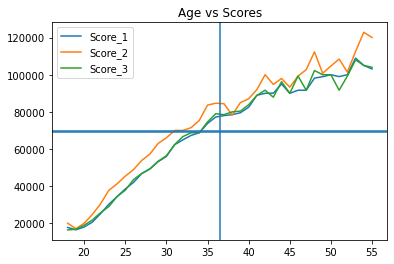

In [37]:
import numpy as np

plt.plot(Age, Score1, label='Score_1')
plt.plot(Age, Score2, label='Score_2')
plt.plot(Age, Score3, label='Score_3')

plt.legend()

plt.axhline(np.mean(Score1))
plt.axhline(np.mean(Score3))

plt.axvline(np.mean(Age))

plt.title('Age vs Scores')

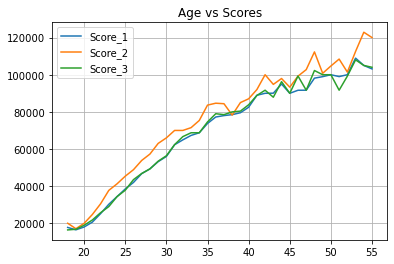

In [39]:
plt.plot(Age, Score1, label='Score_1')
plt.plot(Age, Score2, label='Score_2')
plt.plot(Age, Score3, label='Score_3')

plt.legend()


plt.title('Age vs Scores')

plt.grid(True)

In [40]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

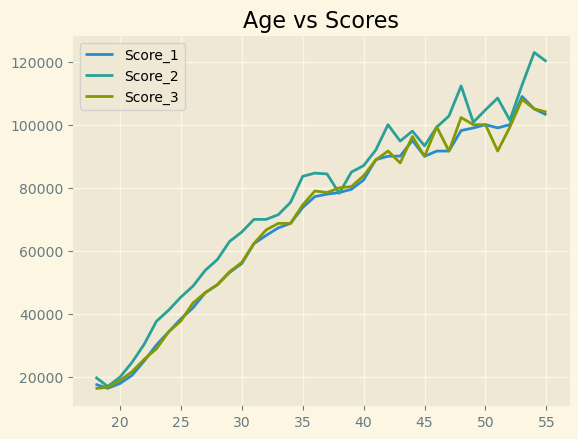

In [41]:
with plt.style.context('Solarize_Light2', after_reset=True):
    plt.plot(Age, Score1, label='Score_1')
    plt.plot(Age, Score2, label='Score_2')
    plt.plot(Age, Score3, label='Score_3')

    plt.legend()


    plt.title('Age vs Scores')

    plt.grid(True)

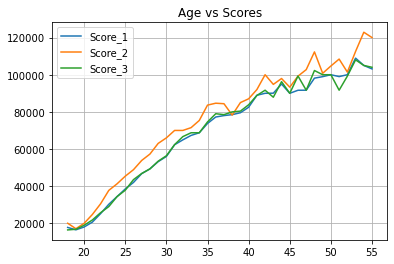

In [42]:
plt.plot(Age, Score1, label='Score_1')
plt.plot(Age, Score2, label='Score_2')
plt.plot(Age, Score3, label='Score_3')

plt.legend()


plt.title('Age vs Scores')

plt.grid(True)

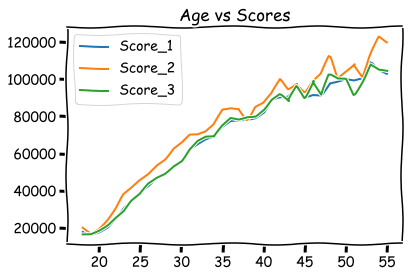

In [43]:
with plt.xkcd():
    plt.plot(Age, Score1, label='Score_1')
    plt.plot(Age, Score2, label='Score_2')
    plt.plot(Age, Score3, label='Score_3')

    plt.legend()


    plt.title('Age vs Scores')

    plt.grid(True)

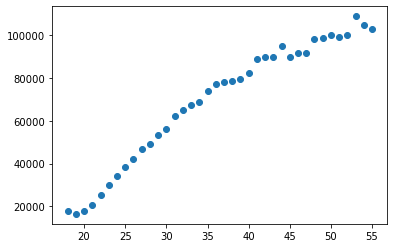

In [44]:
plt.scatter(Age, Score1)

In [45]:
data = pd.read_clipboard()

In [46]:
data

Height  Weight  BP
0      177      76  12
1      194     109   9
2      157      92   9
3      183      87  12
4      157      92   8
5      168      92  14
6      161      73  14
7      165      75  14
8      168      96  13
9      188      81   8
10     166      76   8
11     165     101  13
12     164      51  10
13     172      62  11
14     156     110  10
15     164     103   8
16     175      76  10
17     198      82   9
18     181      72   7
19     179      51   9
20     171      61  14
21     181     110  12

In [47]:
Height = data.Height
Weight = data.Weight
BP = data.BP

Text(0, 0.5, 'Weight')

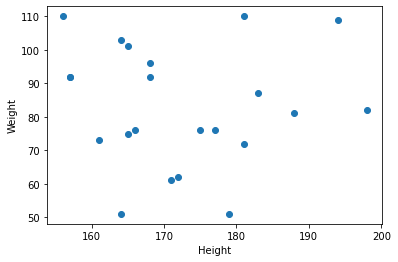

In [49]:
plt.scatter(Height, Weight)
plt.xlabel('Height')
plt.ylabel('Weight')

Text(0, 0.5, 'Weight')

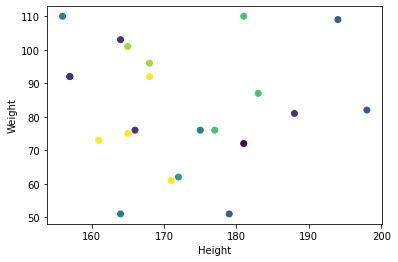

In [51]:
plt.scatter(Height, Weight, c=BP)
plt.xlabel('Height')
plt.ylabel('Weight')

Text(0, 0.5, 'Weight')

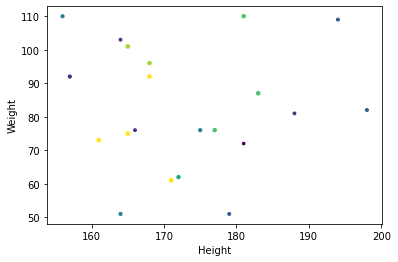

In [52]:
plt.scatter(Height, Weight, c=BP, s=BP)
plt.xlabel('Height')
plt.ylabel('Weight')

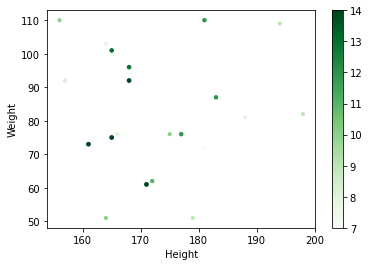

In [54]:
plt.scatter(Height, Weight, c=BP, s=BP, cmap='Greens')
plt.xlabel('Height')
plt.ylabel('Weight')
cbar = plt.colorbar()

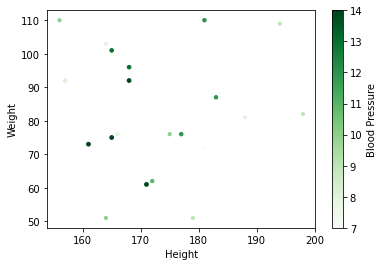

In [55]:
plt.scatter(Height, Weight, c=BP, s=BP, cmap='Greens')
plt.xlabel('Height')
plt.ylabel('Weight')
cbar = plt.colorbar()
cbar.set_label('Blood Pressure')

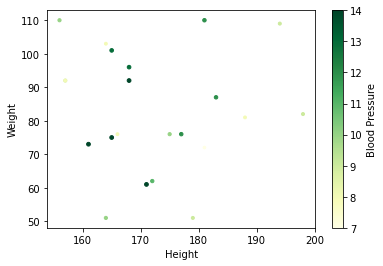

In [56]:
plt.scatter(Height, Weight, c=BP, s=BP, cmap='YlGn')
plt.xlabel('Height')
plt.ylabel('Weight')
cbar = plt.colorbar()
cbar.set_label('Blood Pressure')

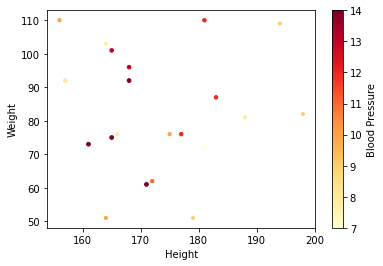

In [57]:
plt.scatter(Height, Weight, c=BP, s=BP, cmap='YlOrRd')
plt.xlabel('Height')
plt.ylabel('Weight')
cbar = plt.colorbar()
cbar.set_label('Blood Pressure')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15df0e68>)

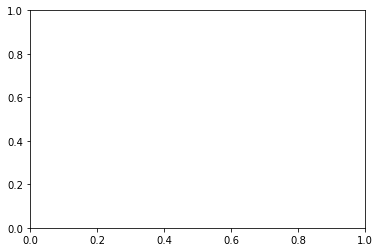

In [58]:
plt.subplots(nrows=1, ncols=1)

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x15E0D7C0>,
       dtype=object))

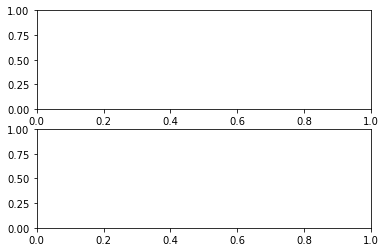

In [59]:
plt.subplots(nrows=2, ncols=1)

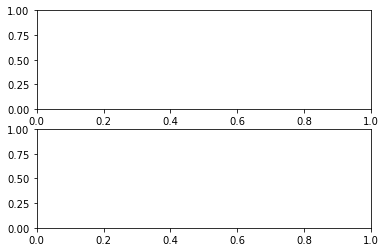

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

<ipython-input-64-3a9cdbe7a00c>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


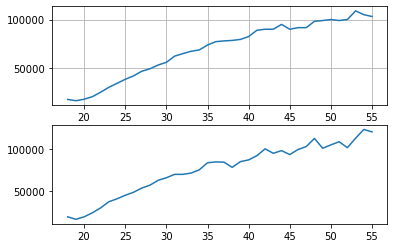

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(Age, Score1, label='Age vs Score1')
ax1.grid(True)

ax2.plot(Age, Score2, label='Score2')

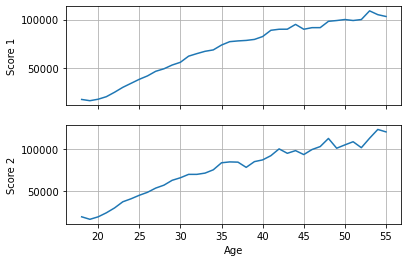

In [92]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(Age, Score1, label='Age vs Score1')
ax1.grid(True)
# ax1.set_xlabel('Age')
ax1.set_ylabel('Score 1')

ax2.plot(Age, Score2, label='Score2')
ax2.set_xlabel('Age')
ax2.set_ylabel('Score 2')
ax2.grid(True)

# plt.savefig('fig.png')

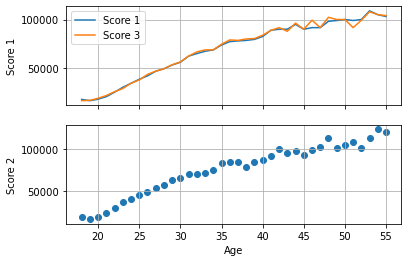

In [94]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(Age, Score1, label='Score 1')
ax1.plot(Age, Score3, label='Score 3')
ax1.grid(True)
ax1.legend()
# ax1.set_xlabel('Age')
ax1.set_ylabel('Score 1')
ax1.legend()

ax2.scatter(Age, Score2, label='Score2')
ax2.set_xlabel('Age')
ax2.set_ylabel('Score 2')
ax2.grid(True)

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14946DD8>,
       dtype=object))

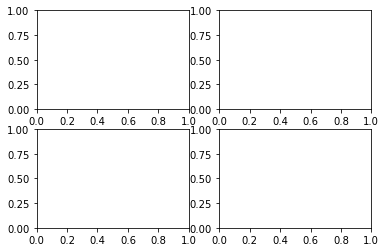

In [66]:
plt.subplots(2, 2)

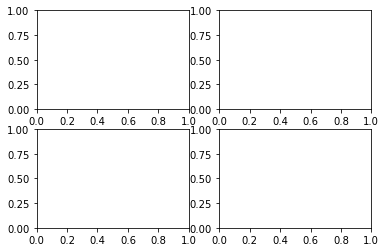

In [67]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

In [76]:
t = [2, 4, 5, 6]

In [77]:
x, y, z, w = t

(<Figure size 432x288 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15FB3A90>,
       dtype=object))

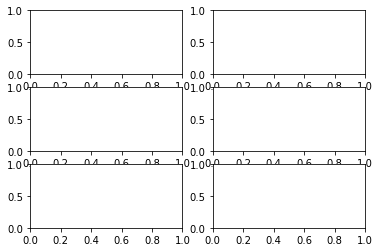

In [82]:
plt.subplots(3,2)

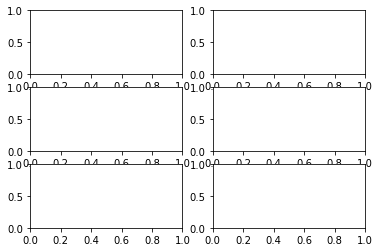

In [83]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)

(<Figure size 432x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1615E7A8>,
       dtype=object))

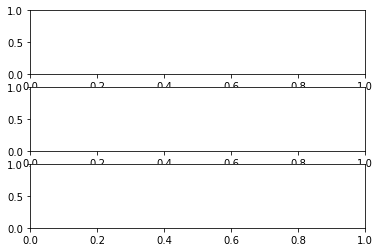

In [84]:
plt.subplots(3,1)

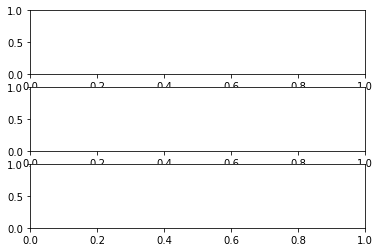

In [86]:
f, (ax1, ax2, ax3) = plt.subplots(3,1)

(<Figure size 432x288 with 12 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x162AC748>,
       dtype=object))

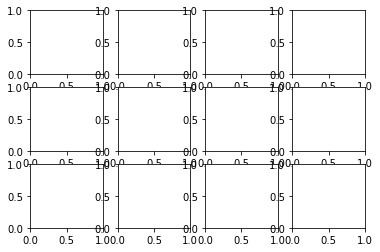

In [87]:
plt.subplots(3,4)

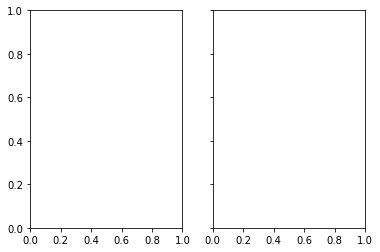

In [95]:
f, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

(110.0, 125.0)

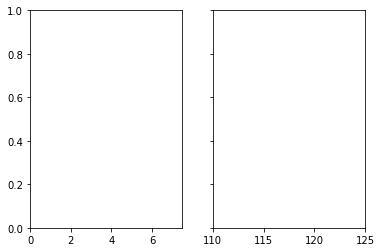

In [97]:
f, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

ax.set_xlim(0, 7.5)
ax2.set_xlim(110, 125)

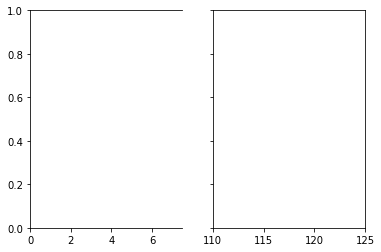

In [99]:
f, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

ax.set_xlim(0, 7.5)
ax2.set_xlim(110, 125)

ax.spines['right'].set_visible(False)

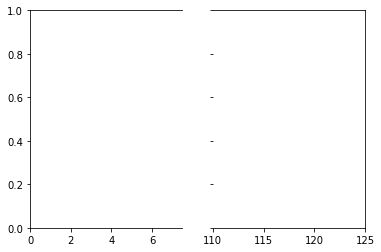

In [100]:
f, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

ax.set_xlim(0, 7.5)
ax2.set_xlim(110, 125)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

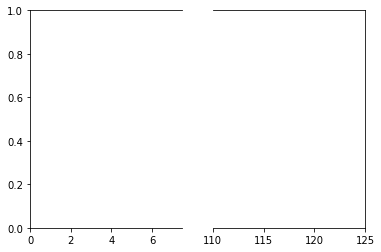

In [102]:
f, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

ax.set_xlim(0, 7.5)
ax2.set_xlim(110, 125)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.tick_params(left=False)

In [115]:
data = pd.read_clipboard()
Age = data.Age
Score1 = data.Score1
Score2 = data.Score2

AttributeError: 'DataFrame' object has no attribute 'Score1'

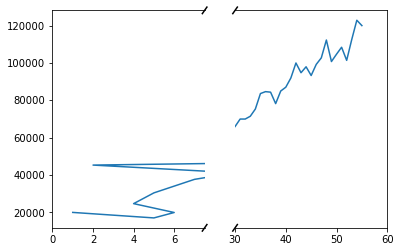

In [118]:
f, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)

ax.set_xlim(0, 7.5)
ax2.set_xlim(30, 60)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.tick_params(left=False)

d = 0.015

kwargs = dict(transform=ax.transAxes, clip_on=False, color='k')
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs = dict(transform=ax2.transAxes, clip_on=False, color='k')
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)


ax.plot(Age, Score2)
ax2.plot(Age, Score2)

In [107]:
1 - 0.015

0.985

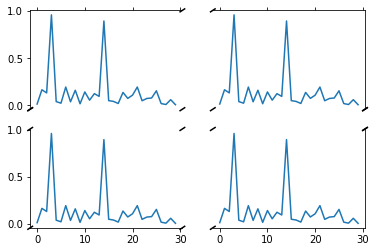

In [119]:
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

pts[[3, 14]] += 0.8



f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, squeeze=False)

ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)


ax2.yaxis.tick_left()
ax2.tick_params(bottom=False, left=False)
ax4.tick_params(top=False, left=False)

# ax.tick_params(labeltop=False)

ax1.plot(pts)
ax2.plot(pts)
ax3.plot(pts)
ax4.plot(pts)

ax1.xaxis.tick_top()
ax2.xaxis.tick_top()

d= 0.015

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (-d, +d ), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (-d,  + d), **kwargs)


kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)


kwargs.update(transform=ax4.transAxes)  # switch to the bottom axes
ax4.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax4.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)


kwargs.update(transform=ax4.transAxes)  # switch to the bottom axes
ax4.plot((-d, +d), (- d,  + d), **kwargs)  # bottom-left diagonal
ax4.plot((1- d, 1+ d), (1- d, 1+ d), **kwargs)